<a href="https://colab.research.google.com/github/MientusJJ/Python-Exercises/blob/main/Kopia_notatnika_Z10_E_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1200023345790189568.0000 - val_loss: 46663200768.0000
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 3247853056.0000 - val_loss: 19932.5254
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 1387.2561 - val_loss: 1.3324
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 1.3414 - val_loss: 1.3173
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 1.3408 - val_loss: 1.3158
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 1.3409 - val_loss: 1.3184
Epoch 7/20
363/363 [==============================] - 2s 6ms/step - loss: 1.3408 - val_loss: 1.3165
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 1.3409 - val_loss: 1.3166
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 1.3410 - val_loss: 1.3179
Epoch 10/20
363/363 [==============================] - 1

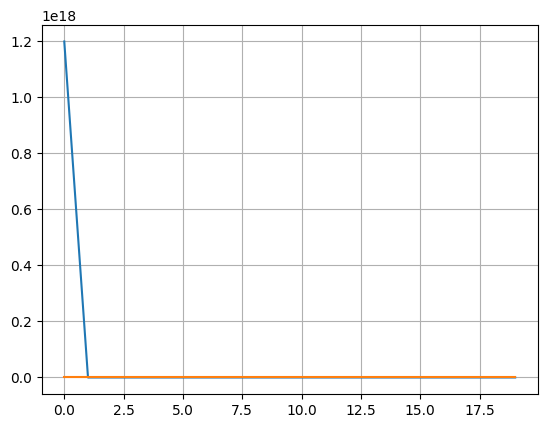

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

print(X_train2.shape)
X_test2.shape

(11610, 8)


(5160, 8)

In [ ]:


model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train2.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train2, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test2, y_test)
X_new = X_test2[:3]
y_pred = model.predict(X_new)



Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7326 - val_loss: 116353.6172
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4579 - val_loss: 65943.0469
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4381 - val_loss: 52613.7812
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4247 - val_loss: 83502.7812
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4422 - val_loss: 106469.0859
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4893 - val_loss: 3904.8877
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4006 - val_loss: 2937.2715
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3840 - val_loss: 5737.8345
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3778 - val_loss: 8777.0605
Epoch 10/20
363/363 [==============================] - 1s 2ms/step

# Dane zawsze muszą być przeskalowane

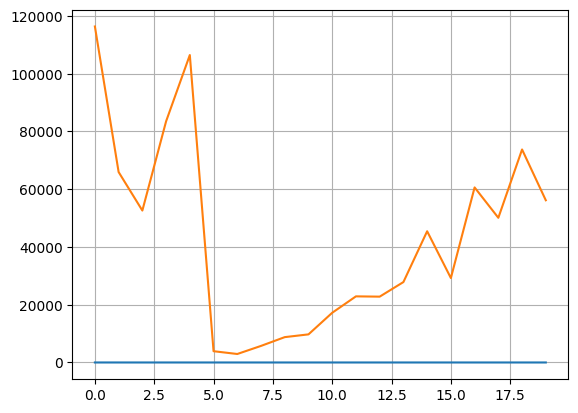

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()